# Declaration of Originality

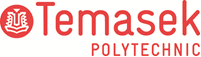

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [37]:
## Import libraries
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Save model
import joblib

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")


All libraries imported successfully!


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [38]:

# Load the dataset
# Note: The dataset uses semicolon (;) as separator
df = pd.read_csv('bank-additional-full.csv', sep=';')

#rename 'y' to 'target' right after reading
df.rename(columns={'y': 'target'}, inplace=True)


In [39]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 2.2 Summary Statistics

In [40]:
# Display basic information

print("DATASET OVERVIEW")

print(f"\nShape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
df.head()


DATASET OVERVIEW

Shape: 41188 rows, 21 columns

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
#stats for numerical features
print(df.describe())


               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

In [42]:
#stats for cat features
print(df.describe(include=['object']))

           job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome target  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


In [43]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

target
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


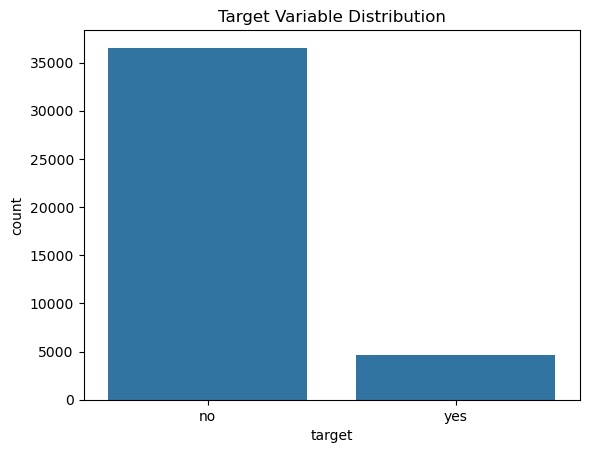

In [44]:
#distrubution of target variable 
print(df['target'].value_counts(normalize=True))

sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()
#since the dataset is imbalanced we will use stratify in train test split

In [45]:
#convert target variable to binary
df['target'] = df['target'].map({'yes': 1, 'no': 0})


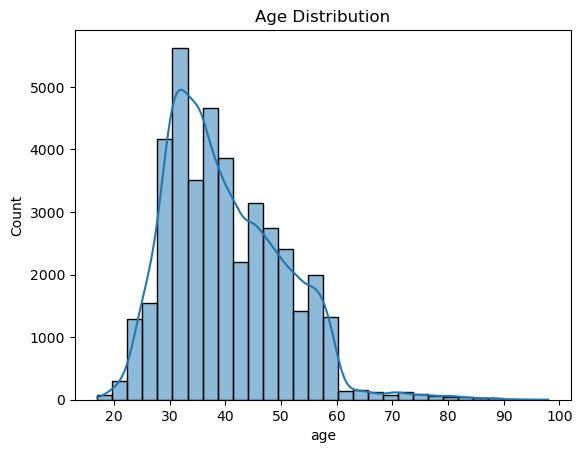

In [46]:
#example : age distribution 

sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()



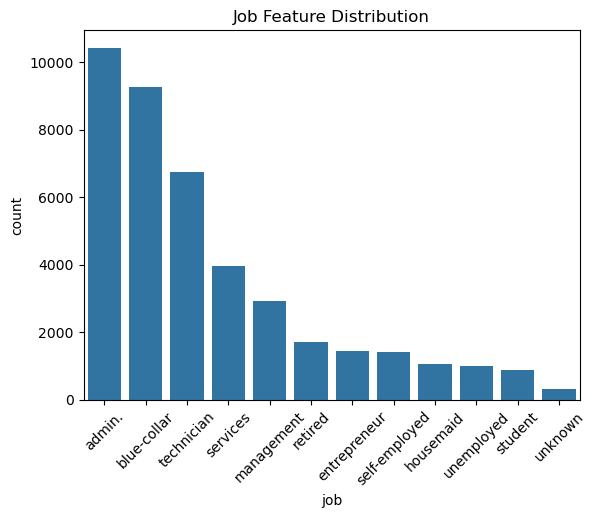

In [47]:
# example :job feature distribution
sns.countplot(x='job', data=df , order=df['job'].value_counts().index)
plt.title('Job Feature Distribution')
plt.xticks(rotation=45)
plt.show()

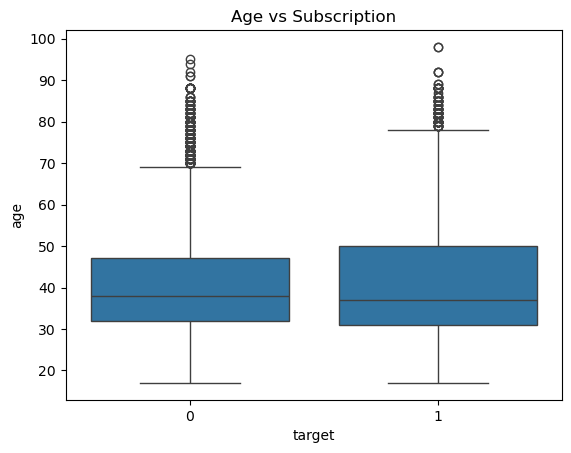

In [48]:
# Age vs Target

sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Subscription')
plt.show()



Text(0.5, 1.0, 'Marital Status vs Subscription')

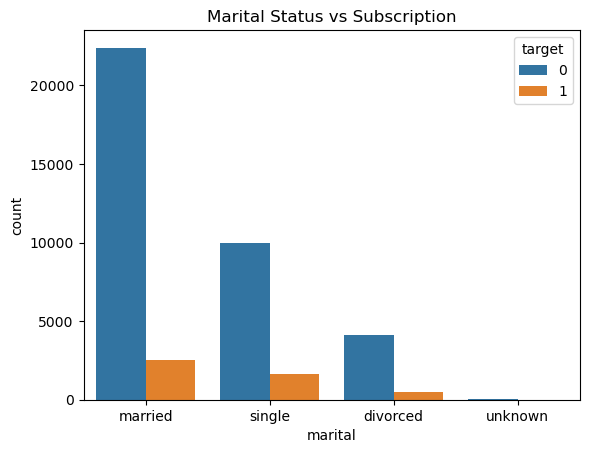

In [49]:
# Marital Status vs Target
sns.countplot(x='marital', hue='target', data=df)
plt.title('Marital Status vs Subscription')

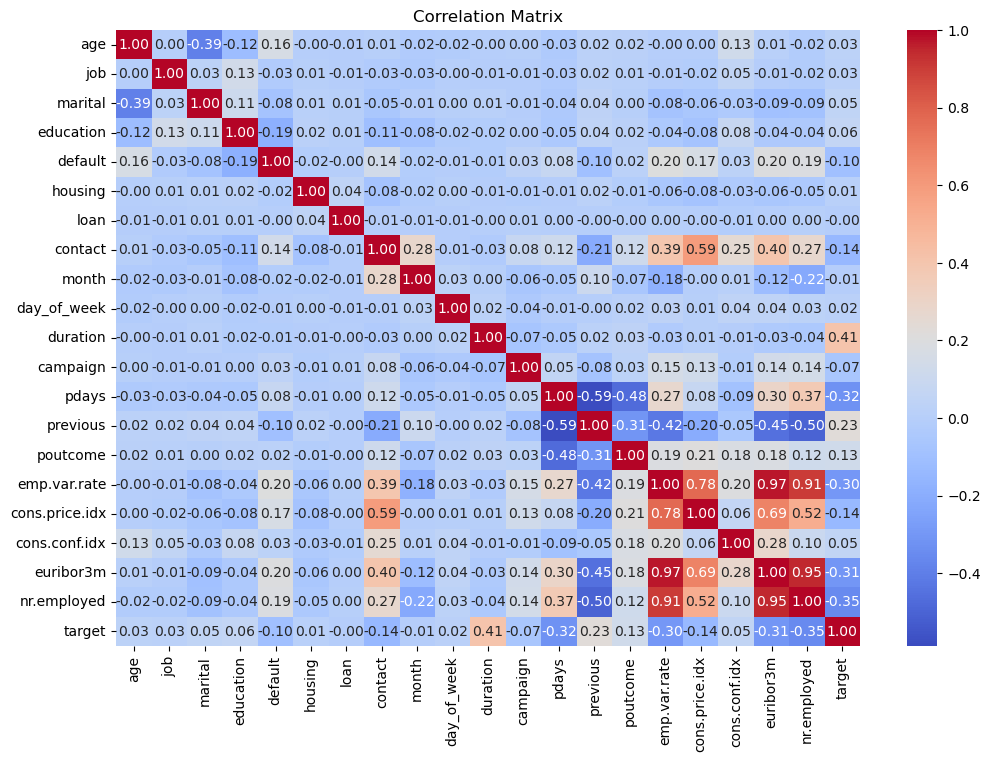

In [50]:
#encode categorical variables temporarily for correlation

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

#correlation matrix
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True , fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [51]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [52]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [53]:
## Understanding relationship between variables


In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

##DATA PREPROCESSING

In [55]:
# Encoding categorical columns

# Define column groups 
onehot_cols = ['marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_cols = ['education', 'month', 'day_of_week']
large_cat = ['job']  # handle separately with frequency / target encoding 

# Numerical Columns - FIXED (removed 'balance')
num_cols = ['age', 'campaign', 'pdays', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols),
        ('large_cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), large_cat)
    ],
)






In [56]:
#Split data
X = df.drop(['target','duration'], axis=1)
y = df['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [67]:
# Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported!")

Libraries imported!


In [68]:
# Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Data preprocessed!")
print(f"X_train shape: {X_train_processed.shape}")
print(f"X_test shape: {X_test_processed.shape}")

Data preprocessed!
X_train shape: (32950, 25)
X_test shape: (8238, 25)


In [69]:
# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("SMOTE applied!")
print(f"\nBefore SMOTE:")
print(f"  Class 0 (No):  {sum(y_train == 0)}")
print(f"  Class 1 (Yes): {sum(y_train == 1)}")

print(f"\nAfter SMOTE:")
print(f"  Class 0 (No):  {sum(y_train_smote == 0)}")
print(f"  Class 1 (Yes): {sum(y_train_smote == 1)}")

SMOTE applied!

Before SMOTE:
  Class 0 (No):  29238
  Class 1 (Yes): 3712

After SMOTE:
  Class 0 (No):  29238
  Class 1 (Yes): 29238


In [70]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
print("Logistic Regression trained!")

Training Logistic Regression...
Logistic Regression trained!


LOGISTIC REGRESSION RESULTS
Accuracy:  0.8083
Precision: 0.3286
Recall:    0.6724
F1 Score:  0.4415


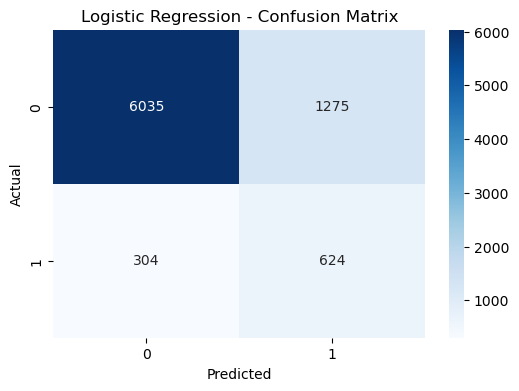

In [71]:
# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test_processed)

print("="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lr):.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [72]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
print("Random Forest trained!")

Training Random Forest...
Random Forest trained!


RANDOM FOREST RESULTS
Accuracy:  0.8927
Precision: 0.5363
Recall:    0.3502
F1 Score:  0.4237


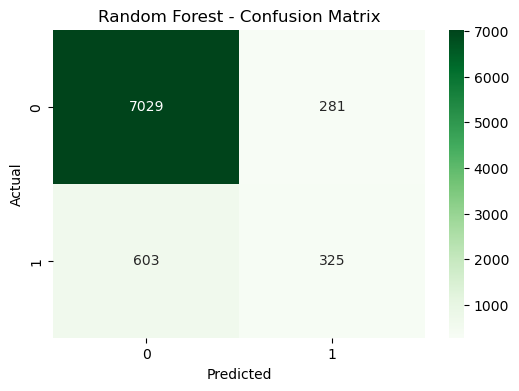

In [73]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_processed)

print("="*50)
print("RANDOM FOREST RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [74]:
# Compare both models
print("="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"{'Metric':<12} {'Logistic Regression':<20} {'Random Forest':<20}")
print("-"*52)
print(f"{'Accuracy':<12} {accuracy_score(y_test, y_pred_lr):<20.4f} {accuracy_score(y_test, y_pred_rf):<20.4f}")
print(f"{'Precision':<12} {precision_score(y_test, y_pred_lr):<20.4f} {precision_score(y_test, y_pred_rf):<20.4f}")
print(f"{'Recall':<12} {recall_score(y_test, y_pred_lr):<20.4f} {recall_score(y_test, y_pred_rf):<20.4f}")
print(f"{'F1 Score':<12} {f1_score(y_test, y_pred_lr):<20.4f} {f1_score(y_test, y_pred_rf):<20.4f}")

MODEL COMPARISON
Metric       Logistic Regression  Random Forest       
----------------------------------------------------
Accuracy     0.8083               0.8927              
Precision    0.3286               0.5363              
Recall       0.6724               0.3502              
F1 Score     0.4415               0.4237              


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection